# Bivariate Visualization

<a id="0"></a>
- [Scatterplots and Correlation](#1)
- [Overplotting, Transparency, and Jitter](#2)
- [Heat Maps for Numeric variables](#3)
- [Violin Plots](#4)
- [Clustered Bar Charts](#5)
- [Faceting](#6)
- [Adaption of Univariate Plots](#7)
- [Line Plots](#8)
- [Q-Q Plots](#9)
- [Swarm Plots](#10)
- [Rug and Strip Plots](#11)
- [Ridgeline Plots](#12)

We will look at three type of bivariate plots:

1. Quantitative vs quantitative: Scatterplots
2. Quantitative vs qualitative: Violin plots 
3. Qualitative vs qualitative: Clustered bar charts

<a id="1"></a>
## Scatterplots and Correlation
[Table of contents](#0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

fuel_econ = pd.read_csv('fuel-econ.csv')

fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


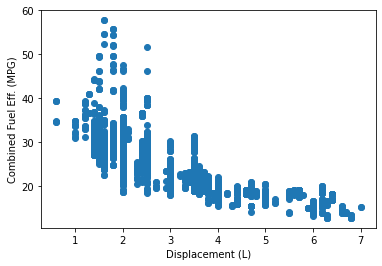

In [3]:
# Make a scatter plot between `displ` (engine displacement) and `comb` (combined fuel efficiency) columns
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (MPG)');

The plot suggests a generally negative correlation between engine size and fuel efficiency. There is a large amount of variability for the smaller displacement compared to the larger ones. 

Alternative way of creating a scatter plot is through seaborn's `regplot` function. This function combines the creation of a scatter plot with the fitting of a regression line to the data.

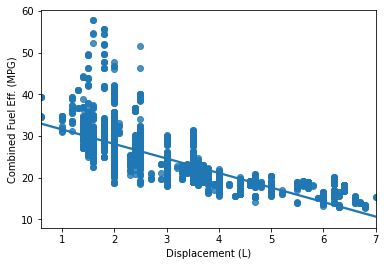

In [5]:
sb.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (MPG)');

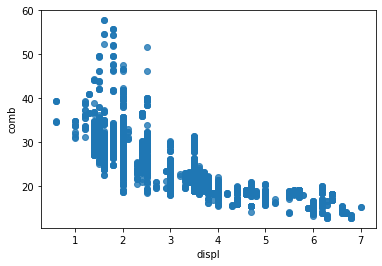

In [7]:
# turn off the regression line
sb.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False);

The displacements are only listed to an accuracy of 0.1 liter. Since there is a lot of data to be plotted, there might be a lot of overlapping points such that we don't really see the true relationship between variables and enought detail. This will be addressed later.

#### Plot the regression line on the transformed data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


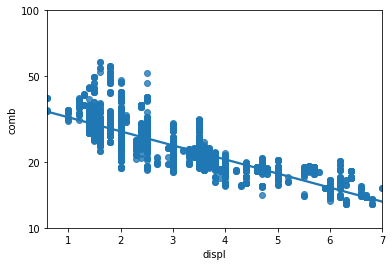

In [10]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

Note - In this example, the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.

<a id="2"></a>
## Overplotting, Transparency, and jitter
[Table of contents](#0)

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Let's see an example below for each Jitter to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.



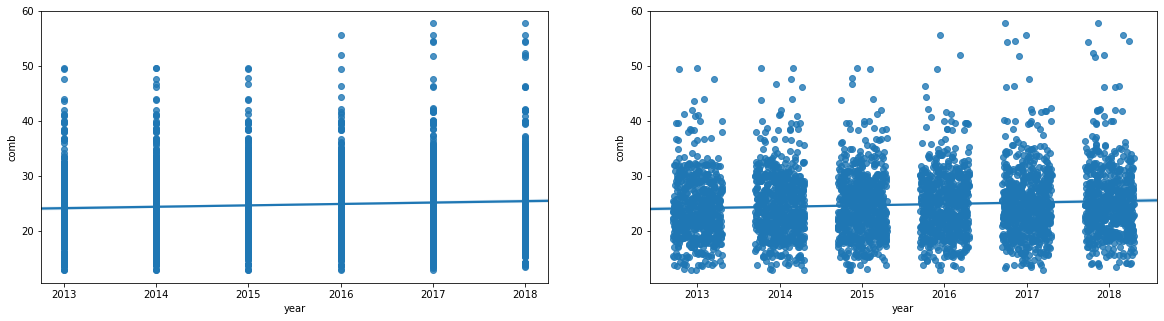

In [21]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head(10)

##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False); 
# sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=True); 

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value be adjusted randomly by +/-0.3
# sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=True, x_jitter=0.3);
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

You can add transparency to either scatter() or regplot() by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). See the example below.

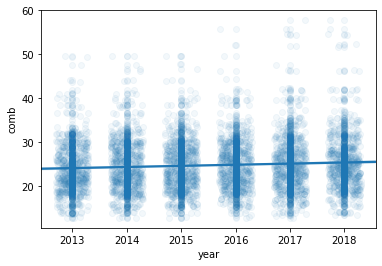

In [15]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

<a id="3"></a>
## Heat Maps for Numeric Variables
[Table of contents](#0)

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. 

Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. 

A heat map can be implemented with Matplotlib's hist2d() function.

Heat maps are useful in the following cases:

1. To represent a plot for discrete vs. another discrete variable
2. As an alternative to transparency when the data points are enormous

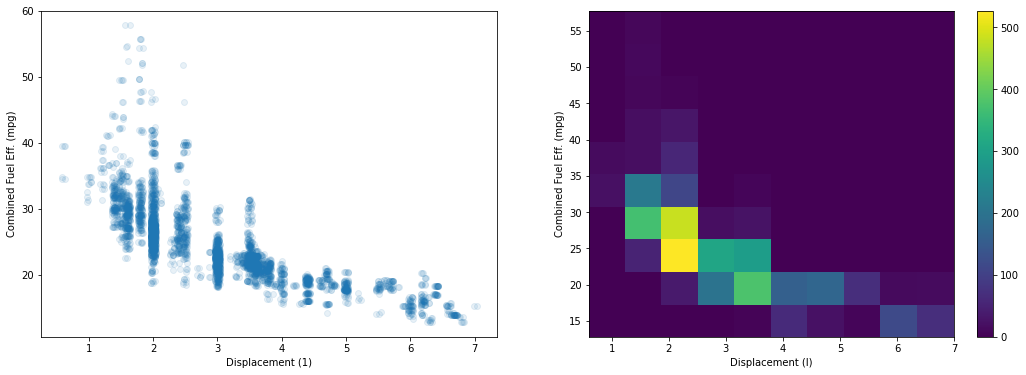

In [22]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel-econ.csv')

plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()    # add a colorbar to the the side of the plot
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Additional variations

**To select a different color palette, you can set the "cmap" parameter in `hist2d`.**

The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on [this part](https://matplotlib.org/stable/api/pyplot_summary.html) of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting cmap = 'viridis_r'.

__Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts.__

The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the `hist2d` call, this means that a cell will only get colored if it contains at least one point.

#### Set a minimum bound on counts and a reverse color map

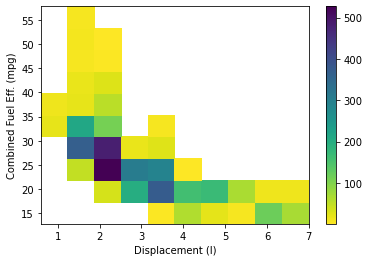

In [24]:

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
# the defaul cmap for hist2d() is 'viridis'
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Specify bin edges

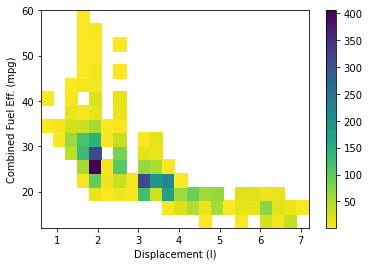

In [26]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

> Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

#### Annotations on each cell

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From `hist2d`, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. 

We can get the counts to annotate directly from what is returned by `hist2d`, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

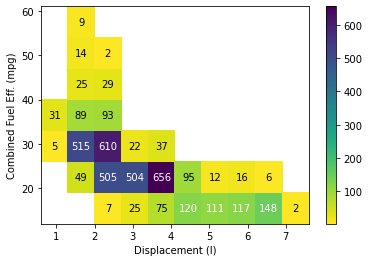

In [29]:
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's `heatmap()` function that is built for categorical heatmaps.

<a id="4"></a>
## Violin Plots
[Table of contents](#0)

There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. 

The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

Seaborn's `violinplot()` function can be used to create violin plots.

In [32]:
fuel_econ.VClass.value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

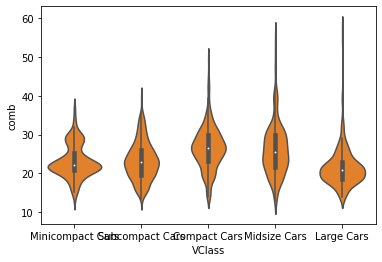

In [49]:
# Types of sedan cars
# sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
# fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['VClass'] = fuel_econ['VClass'].astype('category');
# fuel_econ['VClass'].dtype
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=sb.color_palette()[1]);

Inside each curve, there is a black shape with a white dot inside, a miniature box plot. A further discussion of box plots will be performed next. If you'd like to remove the box plot, you can set the `inner = None` parameter in the `violinplot` call to simplify the look of the final visualization.

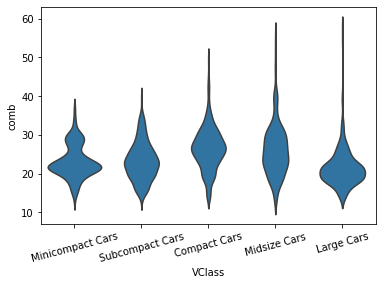

In [52]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

### Additional Variations

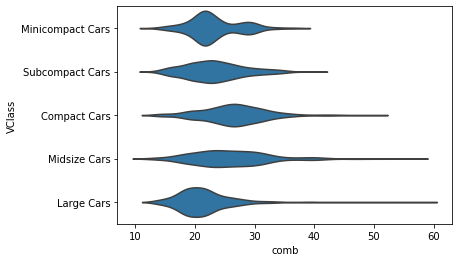

In [54]:
# the violin plot can also be rendered horizontally
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

## Box Plots

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. 

A box plot can be created using seaborn's boxplot() function.

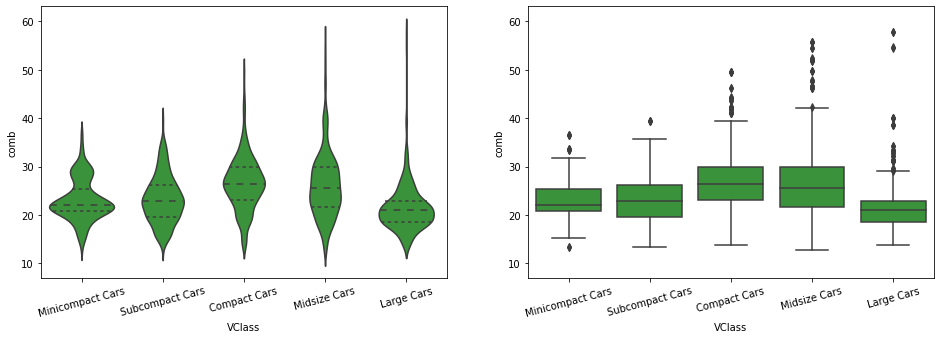

In [61]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
# fuel_econ['VClass'] = fuel_econ['VClass'].astype('category');

plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[2]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile') # depict the IQR in the plot
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

In order to provide a better comparison of the violin and box plots, a `ylim` expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by `violinplot()` is assigned to a variable, `ax1` is used to programmatically obtain those limit values.

### Additional Variations

As with violinplot, boxplot can also render horizontal box plots by setting the numeric and categorical features to the appropriate arguments.

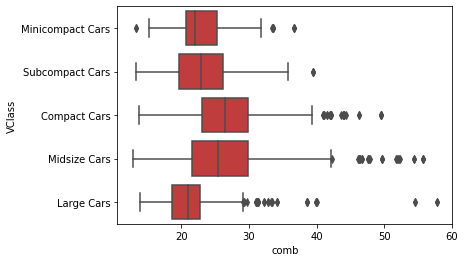

In [62]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=sb.color_palette()[3]);

<a id="5"></a>
## Clustered Bar Charts
[Table of contents](#0)

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. 

Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. 

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. 

This is easiest to see with an example, using seaborn's `countplot` function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument.

### Plot a Bar chart between two qualitative variables using seaborn `countplot`

In [64]:
# Preparatory step 1
# Types of sedan cars
# need this step because we want to specify the orderness we want, 
# otherwise, we can simply use 
# fuel_econ['VClass'] = fuel_econ['VClass'].astype('category') to convert its datatype to category
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [66]:
# Preparatory step 2
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 

# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0]) # using the default '(space)' delimiter
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


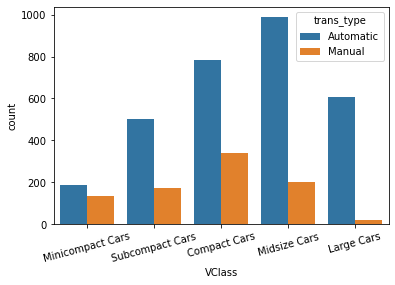

In [97]:
# Plot the clustered bar charts
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

### Alternative Approach using seaborn `heatmap`

One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-D version of a histogram; here, we're using them as the 2-D version of a bar chart. The seaborn function `heatmap()` is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. 

Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [99]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [100]:
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [111]:
# A small demo here
# Manually create a Series with multi-level index
index = pd.MultiIndex.from_tuples([('bird', 'falcon'),
                                   ('bird', 'parrot'),
                                   ('mammal', 'lion'),],
                                  names=['class', 'name'])
data = [389, 24, 80.5]
s = pd.Series(data, index=index)
s

class   name  
bird    falcon    389.0
        parrot     24.0
mammal  lion       80.5
dtype: float64

In [112]:
# resetting the index for a Series turns the series into a dataframe
s.reset_index()

,class,name,0
0,bird,falcon,389.0
1,bird,parrot,24.0
2,mammal,lion,80.5


In [113]:
s = pd.Series(data, index=[1,2,3])
s

1    389.0
2     24.0
3     80.5
dtype: float64

In [115]:
# it works for single-level index as well 
s.reset_index()

,index,0
0,1,389.0
1,2,24.0
2,3,80.5


In [116]:
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [ ]:
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows (x-axis), and trans type on columns (y-axis)
# and count as the values
# it's opposite of pd.melt()
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

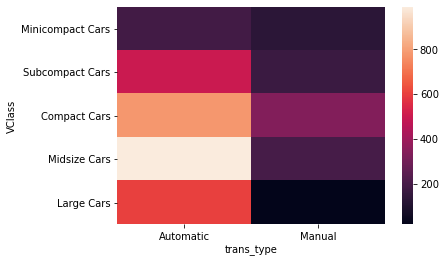

In [119]:
# Plot the heatmap
sb.heatmap(ct_counts);

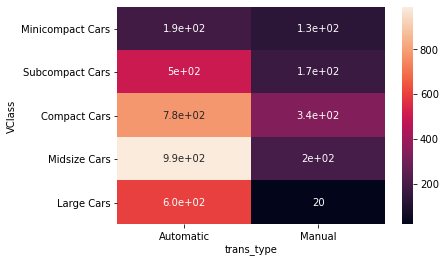

In [122]:
sb.heatmap(ct_counts, annot=True);

`annot=True` makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding `fmt='d'` means that annotations will all be formatted as integers instead. You can use `fmt='.0f'` if you have any cells with no counts, in order to account for NaNs.

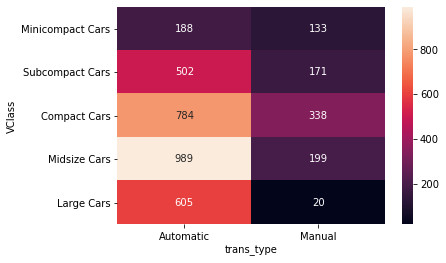

In [124]:
sb.heatmap(ct_counts, annot=True, fmt='d');

<a id="6"></a>
## Faceting
[Table of contents](#0)

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is __faceting__. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. 

Seaborn's FacetGrid class facilitates the creation of faceted plots. 

There are two steps involved in creating a faceted plot:
1. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example). 
2. Then we use the `map` method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").

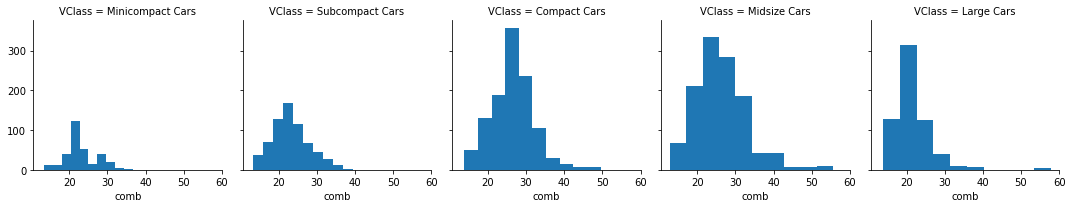

In [4]:
# Preparatory Step
fuel_econ = pd.read_csv('fuel-econ.csv')

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, "comb");

In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like `x="comb"`, or the mapping won't work properly.

 It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

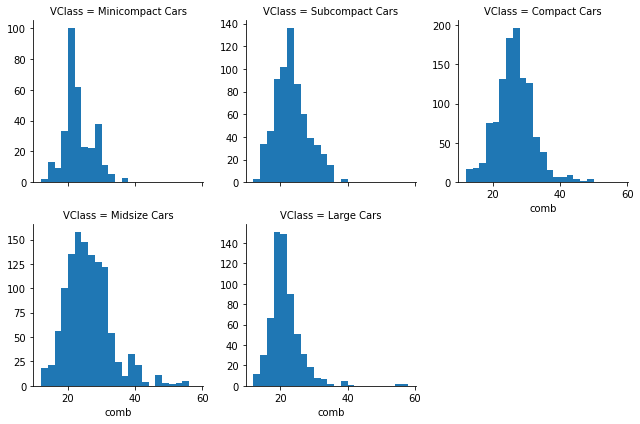

In [5]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins=bin_edges);

### Additional Variation

If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. 

The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

In [8]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index


In [12]:
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [143]:
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

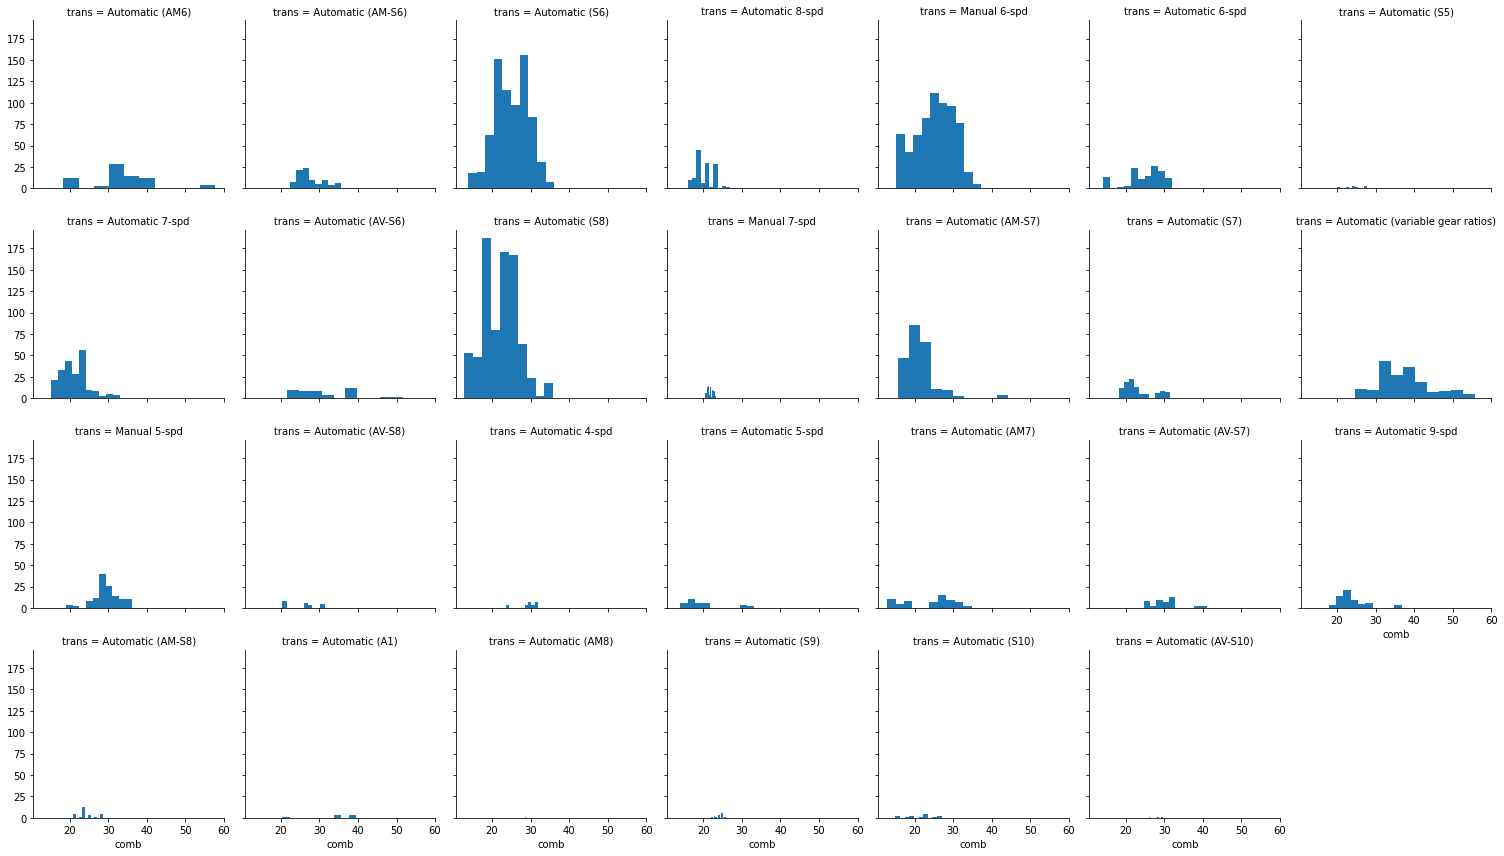

In [13]:
# Use the argument col_order to display the FacetGrid without in the desirable group_order
g = sb.FacetGrid(data=fuel_econ, col='trans', col_wrap=7)
g.map(plt.hist, 'comb');

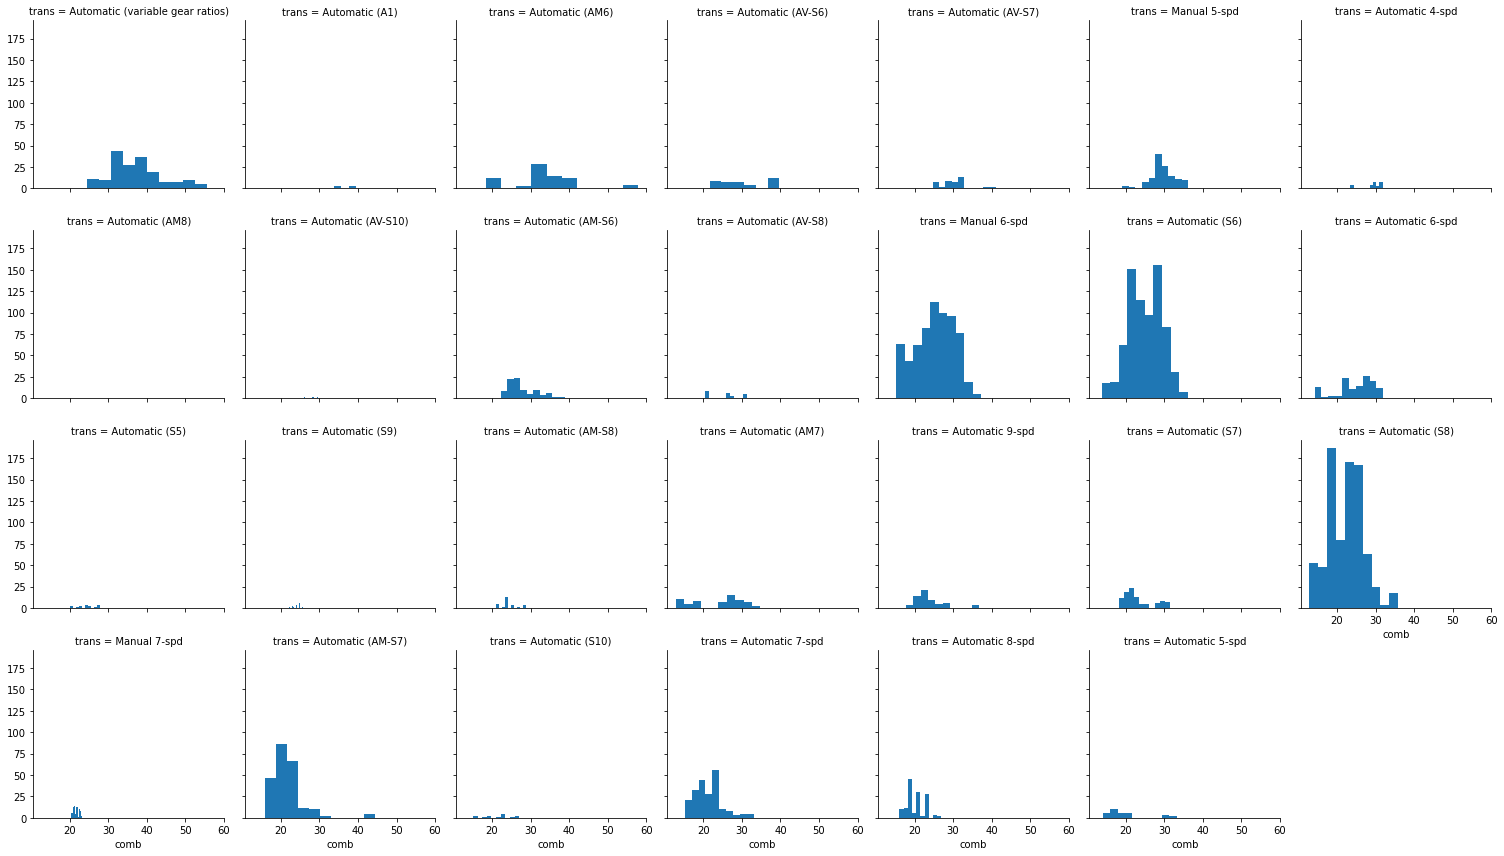

In [14]:
# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data=fuel_econ, col='trans', col_wrap=7, col_order=group_order)
g.map(plt.hist, 'comb');

<a id="7"></a>
## Adaption of Univariate Plots
[Table of contents](#0)

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

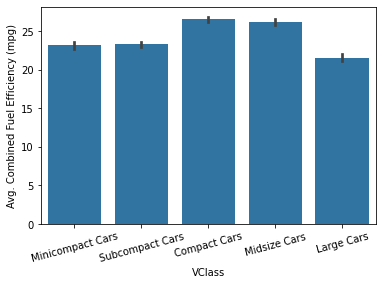

In [16]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

>Different hues are automatically assigned to each category level unless a fixed color is set in the "color" parameter, like in `countplot` and `violinplot`. Also noted that we explicitly added the y label to indicate that the y-axis now shows the averages, not count values. 
>The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

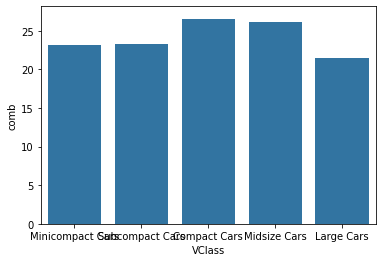

In [19]:
# Remove the uncertainty bar, the error width
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0);

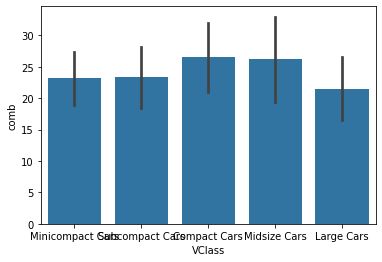

In [21]:
# shows sd (standard deviation) instead of confidence interval
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd');

As an alternative, the `pointplot()` function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

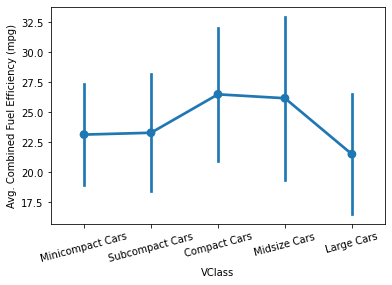

In [23]:
# with the line
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

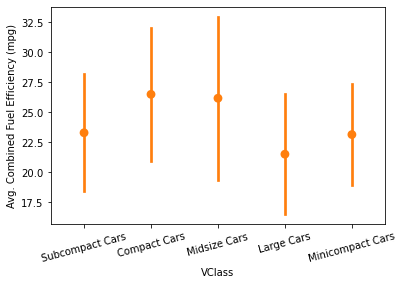

In [144]:
# withotu the line
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

By default, `pointplot` will connect values by a line. This is fine if the categorical variable is *ordinal* in nature, but it can be a good idea to remove the line via `linestyles=""` for nominal data.

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

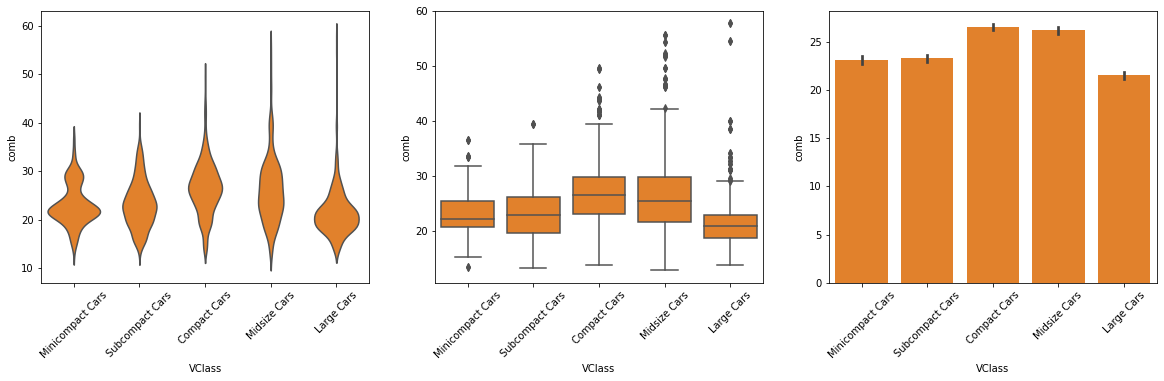

In [24]:
# Bring a few charts together
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[1]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None,
              color = base_color)
plt.xticks(rotation=45);

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45);

*Matplotlib's [`hist()`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.*

<a id="8"></a>
## Line Plots
[Table of contents](#0)

The **line plot** is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. For example, we have only one observation per time period, like in stock or currency charts.

We will make use of Matplotlib's errorbar() function, performing some processing on the data in order to get it into its necessary form.

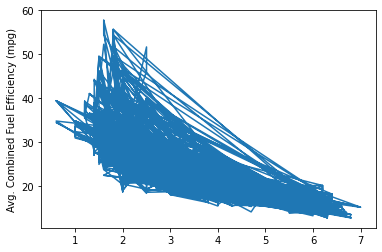

In [32]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

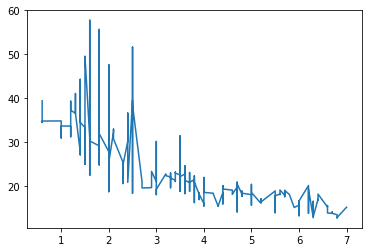

In [59]:
# Also using plot, 
# since there are many decimal values in x-axis, the fluctuation makes the plot unclear to interpret
plt.plot('displ', 'comb', data=fuel_econ);

In [65]:
# Take a look
fuel_econ.displ.value_counts()

2.0    907
3.0    515
3.5    245
1.6    243
3.6    208
1.8    189
2.5    169
2.4    142
1.4    136
4.4    130
1.5    126
3.8    114
5.0     99
3.7     77
4.0     75
6.2     58
4.7     55
6.0     53
3.4     40
5.5     32
6.4     31
5.7     28
6.7     22
2.3     22
6.6     22
3.3     21
4.8     20
4.6     20
1.2     18
6.3     14
5.6     12
1.0     12
3.9      9
2.9      7
1.3      7
6.8      7
2.1      6
0.6      6
4.2      6
2.7      6
5.9      6
4.3      4
5.2      4
5.8      2
7.0      2
3.2      2
Name: displ, dtype: int64

If we just blindly stick a dataframe into the function without considering its structure, we might end up with a mess like the above. The function just plots all the data points as a line, connecting values from the first row of the dataframe to the last row. 

In order to create the line plot as intended, we need to do additional work to summarize the data.

In [27]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object of type category
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [33]:
bin_centers

array([0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1,
       3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7,
       5.9, 6.1, 6.3, 6.5, 6.7, 6.9])

In [34]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

In [35]:
comb_mean

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
(1.6, 1.8]      31.996801
(1.8, 2.0]      27.534614
(2.0, 2.2]      31.790900
(2.2, 2.4]      26.888429
(2.4, 2.6]      28.589656
(2.6, 2.8]      20.227183
(2.8, 3.0]      22.464063
(3.0, 3.2]      22.638350
(3.2, 3.4]      21.962225
(3.4, 3.6]      22.602561
(3.6, 3.8]      20.616143
(3.8, 4.0]      18.977208
(4.0, 4.2]      18.320850
(4.2, 4.4]      18.160620
(4.4, 4.6]      18.668650
(4.6, 4.8]      18.661085
(4.8, 5.0]      18.054693
(5.0, 5.2]      16.481675
(5.2, 5.4]            NaN
(5.4, 5.6]      17.972043
(5.6, 5.8]      18.455833
(5.8, 6.0]      15.161788
(6.0, 6.2]      16.428960
(6.2, 6.4]      16.452696
(6.4, 6.6]      14.890232
(6.6, 6.8]      13.716614
(6.8, 7.0]      15.256400
Name: comb, dtype: float64

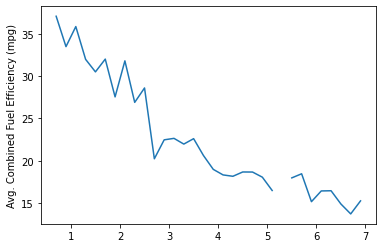

In [50]:
# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean)
# plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

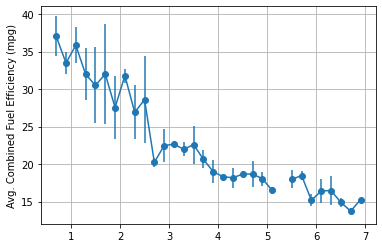

In [56]:
# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std, marker='o')
# plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)', fontsize=10);
plt.grid(True)

### Additional Variations

Use the rolling average technique to make a lineplot

In [102]:
# rolls 15 rows and to return a rolling object
df_window = fuel_econ.sort_values('displ').rolling(15)

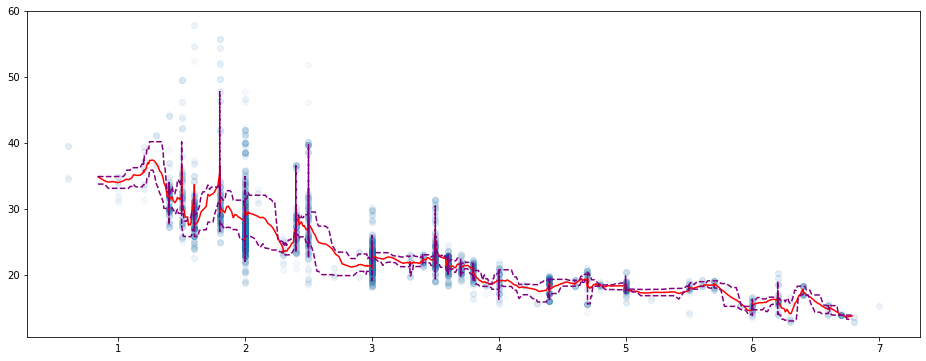

In [141]:
plt.figure(figsize=[16,6])
x_winmin = df_window.mean()['displ'] # take the mean for each 15 rows on x values
y_winmin = df_window.mean()['comb']  
y_q1 = df_window.quantile(0.25)['comb']  # compute the 25 quartile value
y_q3 = df_window.quantile(0.75)['comb']  # compute the 75 quartile value

plt.scatter(data=fuel_econ, x='displ', y='comb', alpha=1/25)  # plot the scatter plot
plt.errorbar(x=x_winmin, y=y_winmin, c='r')  # this is the main line plot we want
plt.errorbar(x=x_winmin, y=y_q1, c='purple', linestyle='--')
plt.errorbar(x=x_winmin, y=y_q3, c='purple', linestyle='--');

In [103]:
fuel_econ.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

Another bivariate application of line plots is to plot the distribution of a numeric variable for different levels of a categorical variable. This is another alternative to using violin plots, box plots, and faceted histograms. With the line plot, one line is plotted for each category level, like overlapping the histograms on top of one another. 

This can be accomplished through multiple errorbar calls using the methods above, or by performing multiple hist calls, setting the "histtype=step" parameter so that the bars are depicted as unfilled lines.

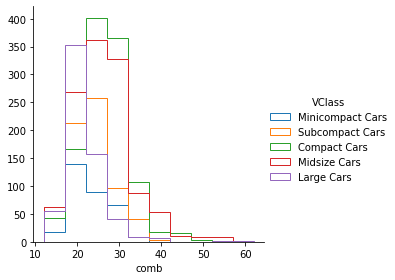

In [119]:
bin_edges = np.arange(12, 57.79+5, 5)
g = sb.FacetGrid(data=fuel_econ, hue='VClass', height=4)
g.map(plt.hist, "comb", bins = bin_edges, histtype = 'step')
g.add_legend();

Note that I'm performing the multiple `hist` calls through the use of FacetGrid, setting the categorical variable on the "hue" parameter rather than the "col" parameter. You'll see more of this parameter of FacetGrid in the next lesson. I've also added an `add_legend` method call so that we can identify which level is associated with each curve.

Unfortunately, the "Minicompact Cars" curve seems to be pretty lost behind the other curves since the relatively low number of counts is causing a lot of overlap. Perhaps connecting the centers of the bars with a line, like what was seen in the first errorbar example, would be better.

Functions you provide to the map method of FacetGrid objects do not need to be built-ins. Below, I've written a function to perform the summarization operations seen above to plot an errorbar line for each level of the categorical variable, then fed that function (freq_poly) to map.

In [137]:
def freq_poly(x, bins=10, **kwargs):
    """ Custom frequency polygon / line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)    
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2    

    # compute counts
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x=bin_centers, y=counts, **kwargs)

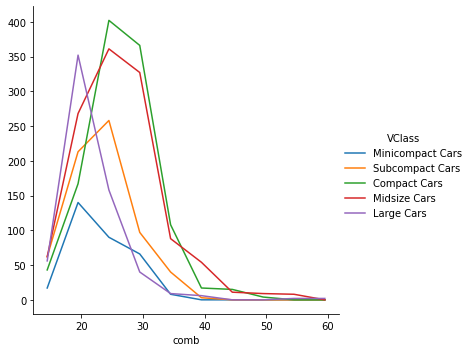

In [138]:
bin_edges = np.arange(12, 57.79+5, 5)
g = sb.FacetGrid(data=fuel_econ, hue='VClass', height=5)
g.map(freq_poly, "comb", bins=bin_edges)
g.add_legend();

`**kwargs` is used to allow additional keyword arguments to be set for the errorbar function.

<a id="9"></a>
## Q-Q Plots
[Table of contents](#0)

There might be cases where you are interested to see how closely your numeric data follows some hypothetical distribution. This might be important for certain parametric statistical tests, like checking for assumptions of normality. In cases like this, you can use a quantile-quantile plot, or Q-Q plot, to make a visual comparison between your data and your reference distribution. Take for example the following comparison of the following data and a hypothetical normal distribution using the sample statistics:

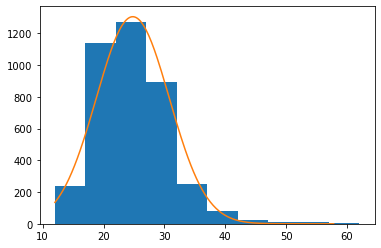

In [10]:
# create a histogram of the data
bin_size = 5
bin_edges = np.arange(12, 57.79+bin_size, bin_size)
plt.hist(data=fuel_econ, x='comb', bins = bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = fuel_econ['comb'].mean()
samp_sd = fuel_econ['comb'].std()

from scipy.stats import norm
x = np.linspace(12, 57.79, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
# print(y) # y value is very small
# print(y[0] * fuel_econ.shape[0] * bin_size)
y *= fuel_econ.shape[0] * bin_size # scale the distribution height
plt.plot(x, y);

The matplotlib plot function is a generic function for plotting y-values against x-values, by default a line connecting each x-y pair in sequence. In this case, I first use numpy's linspace function to generate x-values across the range of the plot. Note that the first two arguments match the bin_edges limits, while the third argument specifies the number of values to generate between the two endpoints. Then, I use the scipy package's norm class to get the height of the normal distribution curve at those x-values, using the sample mean and standard deviation as distribution parameters. pdf stands for probability density function, which returns the normal distribution height (density) at each value of x. These values are such that the total area under the curve will add up to 1. Since we've got a histogram with absolute counts on the y-axis, we need to scale the curve so it's on the same scale as the main plot: we do this by multiplying the curve heights by the number of data points and bin size.

 The question now that we'd like to address is if there's enough evidence from what we've observed to say that the data is significantly different from the expected normal distribution.

One way we could approach this is through a statistical test, such as using scipy's shapiro function to perform the Shapiro-Wilk test. But since this is a tutorial on data visualization, we'll inspect this question visually, using the Q-Q plot type teased at the top of the page. 

The main idea of the plot is this: if the data was normally distributed, then we'd expect a certain pattern in terms of how far each data point is from the mean of the distribution. If we order the points from smallest to largest, then we could compare how large the _k_-th ranked data point is against the _k_-th ranked point from the expected distribution.

To get these expected values, we'll make use of the `norm` class's `ppf` function, which stands for percent point function. The `ppf` takes as input a proportion (valued between 0 and 1) and returns the value in the distribution that would leave that proportion of the curve to the left. For a standard normal distribution (mean = 0, standard deviation = 1), the `ppf(0.25) = -0.674`, `ppf(0.5)=0`, and `ppf(0.75) = 0.674`. The main question, then, is what values to stick into the ppf.

There's a few different conventions around this, but they generally take the form of the following equation:

> Given _n_ data points, the _k_-th value should be at probability point (quantile) $q(k) = \frac{k-a}{n+1-2a}$ 
> , for some _a_ between 0 and 1 (inclusive).

This equation distributes the probability points symmetrically about 0.5, and adjusting _a_ changes how much probability is left in the tails of the [0,1] range. Commonly, _a_ is set to a balanced value of 0.5, which gives the equation $\frac{k-0.5}{n}$. Let's put this all together using code:

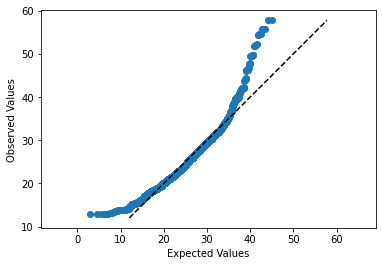

In [15]:
n_points = fuel_econ.shape[0]
qs = (np.arange(n_points) - .5) / n_points
samp_mean = fuel_econ['comb'].mean()
samp_sd = fuel_econ['comb'].std()
expected_vals = norm.ppf(qs, samp_mean, samp_sd)

plt.scatter(expected_vals, fuel_econ['comb'].sort_values())

plt.plot([12, 57.79], [12, 57.79], '--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Values')
plt.ylabel('Observed Values');

Usually, the Q-Q plot is computed and rendered in terms of standardized units, rather than the scale of the original data. A standardized dataset has a mean of 0 and standard deviation of 1, so to convert a set of values into standard scores, we just need to subtract the sample mean from each value to center it around 0, then divide by the sample standard deviation to scale it. Calling methods of the `norm` class without arguments for the mean or standard deviation assume the standard normal distribution. The code changes as follows:

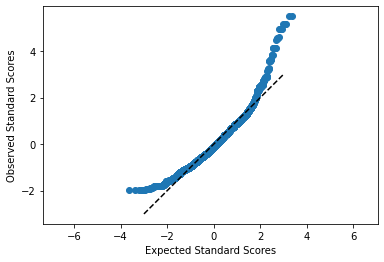

In [16]:
n_points = fuel_econ.shape[0]
qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (fuel_econ['comb'].sort_values() - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-3,3],[-3,3],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores');

Let's also take a quick look at the Q-Q plot when the data distribution does not fit the normal distribution assumptions. Instead of generating data from a normal distribution, I'll now generate data from a uniform distribution:

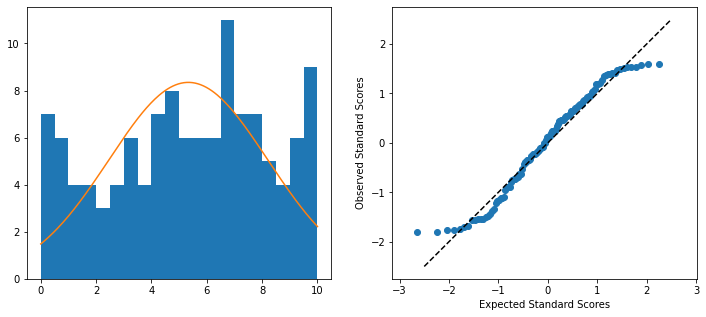

In [18]:
# generate the data
np.random.seed(8322489)

n_points = 120
unif_data = np.random.uniform(0, 10, n_points)

# set up the figure
plt.figure(figsize = [12, 5])

# left subplot: plot the data
plt.subplot(1, 2, 1)
bin_size = 0.5
bin_edges = np.arange(0, 10 + bin_size, bin_size)
plt.hist(x=unif_data, bins=bin_edges);

# overlay a theoretical normal distribution on top
samp_mean = unif_data.mean()
samp_sd = unif_data.std()

from scipy.stats import norm
x = np.linspace(0, 10, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= n_points * bin_size # scale the distribution height
plt.plot(x, y)



# right subplot: create a Q-Q plot
plt.subplot(1, 2, 2)

qs = (np.arange(n_points) - .5) / n_points
expected_scores = norm.ppf(qs)
data_scores = (np.sort(unif_data) - samp_mean) / samp_sd

plt.scatter(expected_scores, data_scores)
plt.plot([-2.5,2.5],[-2.5,2.5],'--', color = 'black')
plt.axis('equal')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed Standard Scores');

When we compare the random standardized scores drawn from the uniform distribution to the expected scores from the theoretical normal distribution in the Q-Q plot, we see an S-shaped curve. The comparison of values in the middle of the curve are approximately linear in trend, but the slope is steeper than the desired y = x. Meanwhile on the edges, the slope is extremely shallow, as the uniform distribution is fixed to a finite range, but the normal distribution values in the tails are expected to be much further away. You can somewhat see this in the superimposed distribution line in the left-side plot, where even at the edges of the data, there is still quite a bit of height to the theoretical normal curve. All of this contributes to the result that the randomly-generated uniform data can't be well-approximated by the normal distribution.

<a id="10"></a>
## Swamp Plots
[Table of contents](#0)

In this lesson, you saw many ways of depicting the relationship between a numeric variable and a categorical variable. Violin plots depicted distributions as density curves, while box plots took a more summary approach, plotting the quantiles as boxes with whiskers. 

Another alternative to these plots is the **swarm plot**. Similar to a scatterplot, each data point is plotted with position according to its value on the two variables being plotted. Instead of randomly jittering points as in a normal scatterplot, points are placed as close to their actual value as possible without allowing any overlap. 

A swarm plot can be created in seaborn using the `swarmplot` function, similar to how you would  call `violinplot` or `boxplot`.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.0% of the points

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Subcompact Cars'),
  Text(1, 0, 'Compact Cars'),
  Text(2, 0, 'Midsize Cars'),
  Text(3, 0, 'Large Cars'),
  Text(4, 0, 'Minicompact Cars')])

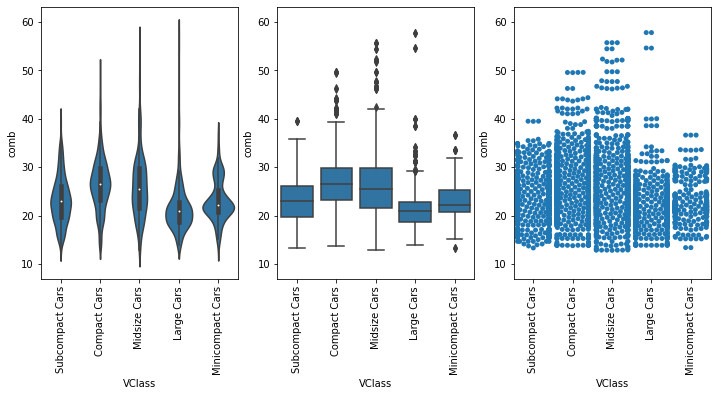

In [21]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=90)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=90)

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation=90);

Looking at the plots side by side, you can see relative pros and cons of the swarm plot. Unlike the violin plot and box plot, every point is plotted, so we can now compare the frequency of each group in the same plot. While there is some distortion due to location jitter, we also have a more concrete picture of where the points actually lie, removing the long tails that can be present in violin plots.

However, it is only reasonable to use a swarm plot if we have a small or moderate amount of data. If we have too many points, then the restrictions against overlap will cause too much distortion or require a lot of space to plot the data comfortably. In addition, having too many points can actually be a distraction, making it harder to see the key signals in the visualization. Use your findings from univariate visualizations to inform which bivariate visualizations will be best, or simply experiment with different plot types to see what is most informative.

<a id="11"></a>
## Rug and Strip Plots
[Table of contents](#0)

You might encounter, or be interested in, marginal distributions that are plotted alongside bivariate plots such as scatterplots. A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable. 

For quantitative data, histograms or density curves are fine choices for marginal plot, but you might also see the **rug plot** employed. In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. 

Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.

Seaborn's `JointGrid` class enables this plotting of bivariate relationship with marginal univariate plots for numeric data. 

The `plot_joint` method specifies a plotting function for the main, joint plot for the two variables, while the `plot_marginals` method specifies the plotting function for the two marginal plots.

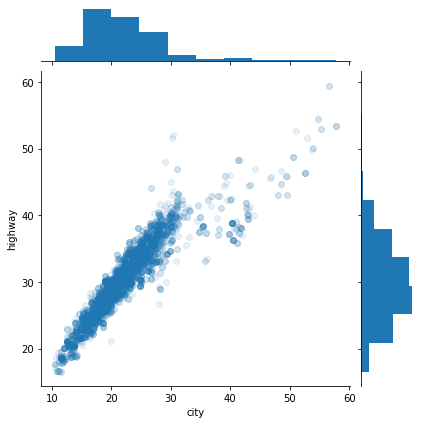

In [32]:
# marginal plot with histograms
g = sb.JointGrid(data=fuel_econ, x='city', y = 'highway')
g.plot_joint(plt.scatter, alpha=0.1)
g.plot_marginals(plt.hist);

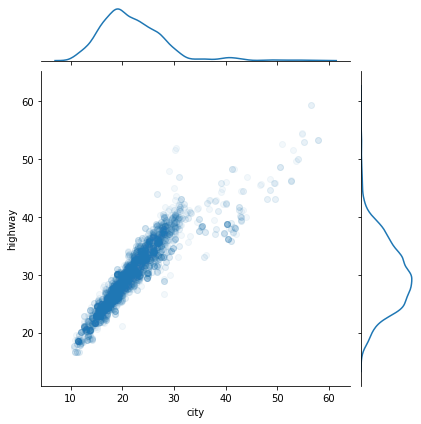

In [33]:
# marginal plot with density curves
g = sb.JointGrid(data=fuel_econ, x='city', y = 'highway')
g.plot_joint(plt.scatter, alpha=0.05)
g.plot_marginals(sb.kdeplot);

 Here, we make use of seaborn's `rugplot` function.

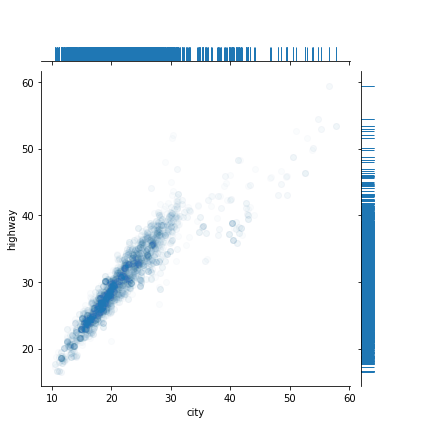

In [34]:
g = sb.JointGrid(data=fuel_econ, x='city', y = 'highway')
g.plot_joint(plt.scatter, alpha=0.02)
g.plot_marginals(sb.rugplot, height=0.25);

The rug plot is not working fine here since the data is numerous or overly dense. A histogram or density curve will be more appropriate. You probably won't consider the rug plot as a primary plot choice, but it can be a good supporter plot in certain circumstances.

Another supporting plot type similar to the **rug plot** is the strip plot. It's like a swarm plot but without any dodging or jittering to keep points separate or off the categorical line. You can also think of it as a rug plot faceted by categorical levels. 

You can use seaborn's `swarmplot` function to add a swarm plot to any other plot. 

The `inner="stick"` and `inner="point"` options can also be used with the `violinplot` function to include a strip plot inside of the violin areas, instead of a box plot.

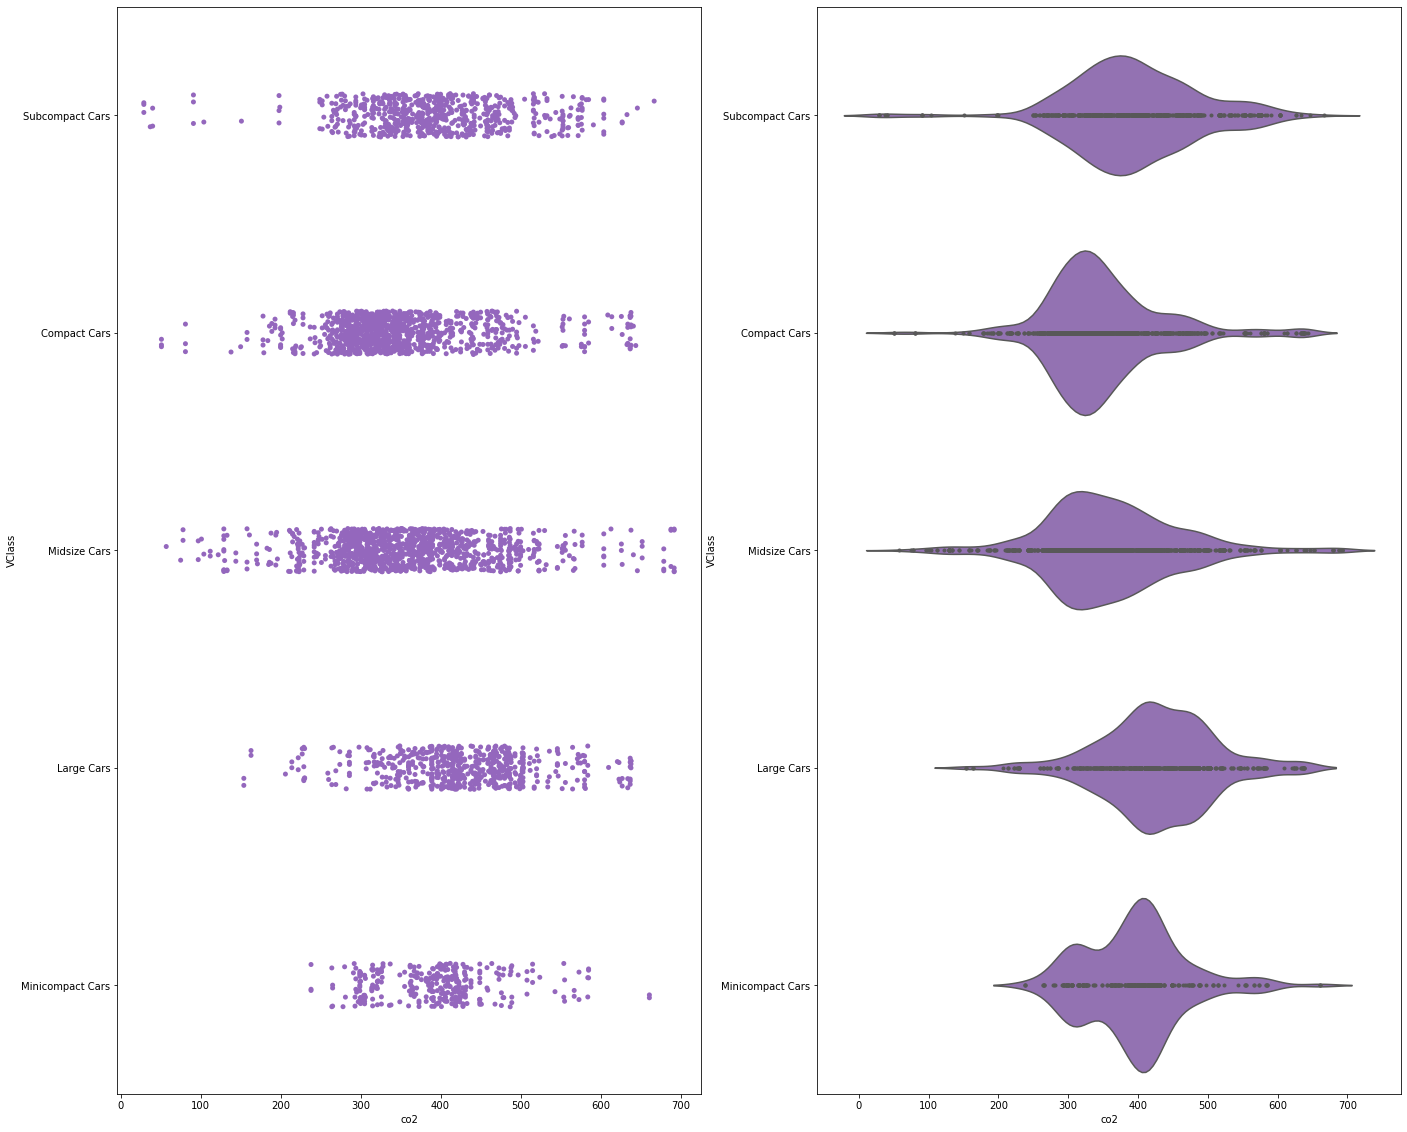

In [46]:
plt.figure(figsize = [23, 20])
base_color = sb.color_palette()[4]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sb.stripplot(data=fuel_econ, x='co2', y='VClass', color=base_color)

# right plot: violin plot with inner strip plot as points
plt.subplot(1, 2, 2)
sb.violinplot(data=fuel_econ, x='co2', y='VClass', color=base_color, inner='point');

<a id="12"></a>
## Ridgeline Plots
[Table of contents](#0)

One of the hot new visualization types from recent years is the ridgeline plot. In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes. This can be thought of as a contrast to the line plot variation seen in the "Line Plots" section, where multiple lines were plotted on the same axes, with different hues. 

On this page, I'll walk through the creation of a ridgeline plot using some of the demonstration data shown in the "Faceting" page.

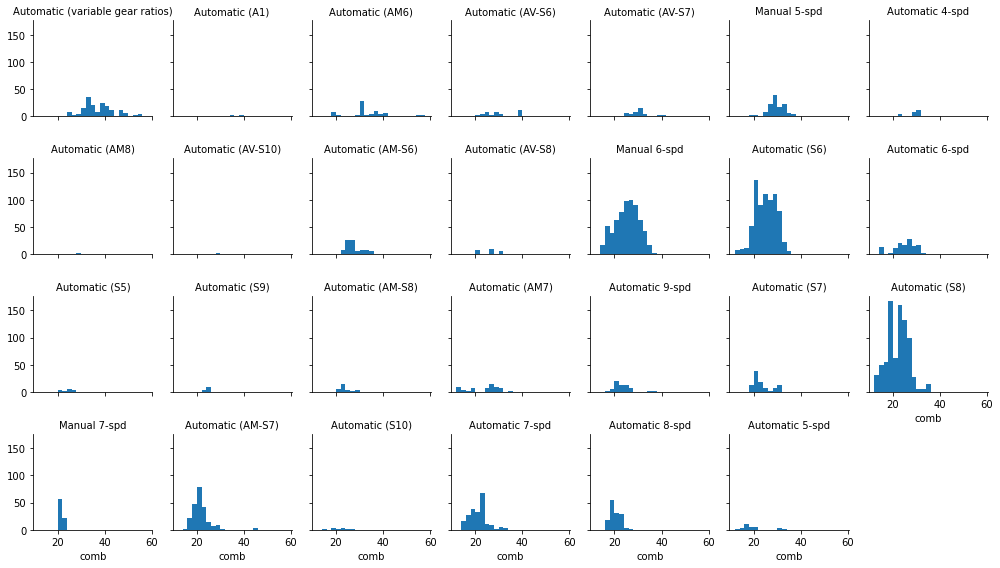

In [74]:
bin_edges = np.arange(12, 58+2, 2)
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index


g = sb.FacetGrid(data=fuel_econ, col='trans', height=2, col_wrap=7, col_order=group_order)
g.map(plt.hist, 'comb', bins=bin_edges);
g.set_titles('{col_name}');

Two things immediately come to mind for changing the faceted histograms into a ridgeline plot. 

First of all, changing the form of the distribution plots from histograms to kernel density estimates will make the overlaps a bit smoother. Second, we need to facet the levels by rows so that they're all stacked up on top of one another.

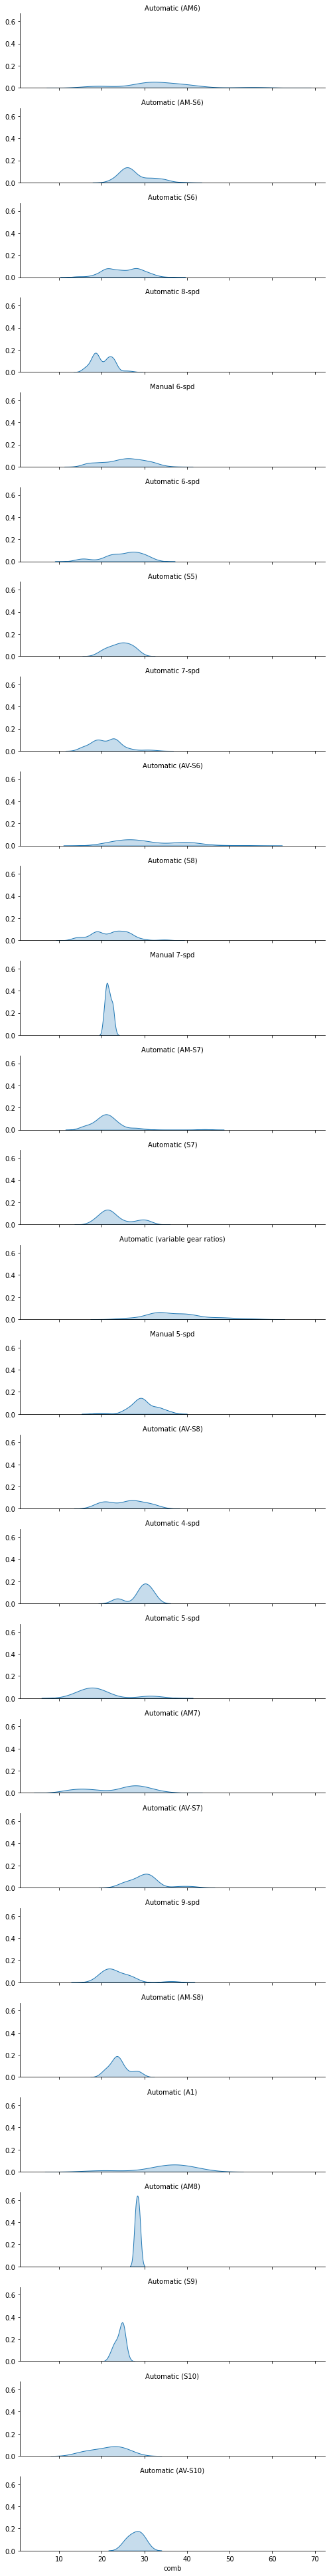

In [73]:
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index


g = sb.FacetGrid(data=fuel_econ, row='trans', height=2, 
                 col_order=group_order, aspect=3.5)
g.map(sb.kdeplot, 'comb', shade=True)
g.set_titles('{row_name}');

Now we've got all of the group distributions stacked on top of one another for a uni-dimensional comparison, but the plot's still pretty tall. Next, we'll create some overlap between the individual subplots.

I've added the `"gridspec_kws"` parameter to the `FacetGrid` call to adjust the arrangement of subplots in the grid through Matplotlib's `GridSpec` class. By setting `"hspec"` to a negative value, the subplot axes bounds will overlap vertically. The `"size"` and `"aspect"` parameters have also been adjusted. 

While I'm at it, I'll add some code on the `FacetGrid` object to remove the y-axis through the `despine` method and remove the ticks through the `set` method. They're going to start overlapping, and we don't really need them – we're mostly interested in the relative positions of the distributions rather than specific heights.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


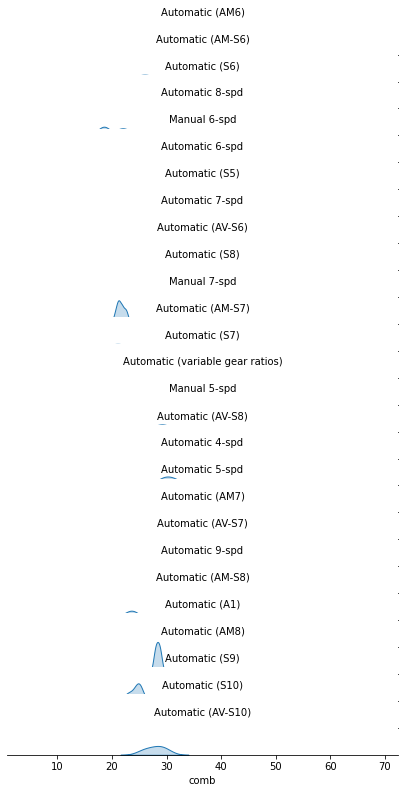

In [85]:
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index


g = sb.FacetGrid(data=fuel_econ, row='trans', height=0.5, 
                 col_order=group_order, aspect=14, gridspec_kws={'hspace': -0.2})
g.map(sb.kdeplot, 'comb', shade=True);

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}');

The individual subplots now overlap, but we've still got a problem: the backgrounds of the subplots are opaque, thus obscuring all but the tops of all of the individual group distributions, with the exception of the lowest. 

In addition, the individual subplot titles overlap the other distributions with some ambiguity: these should be moved elsewhere in the individual plots. The revised code and plot look like this:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


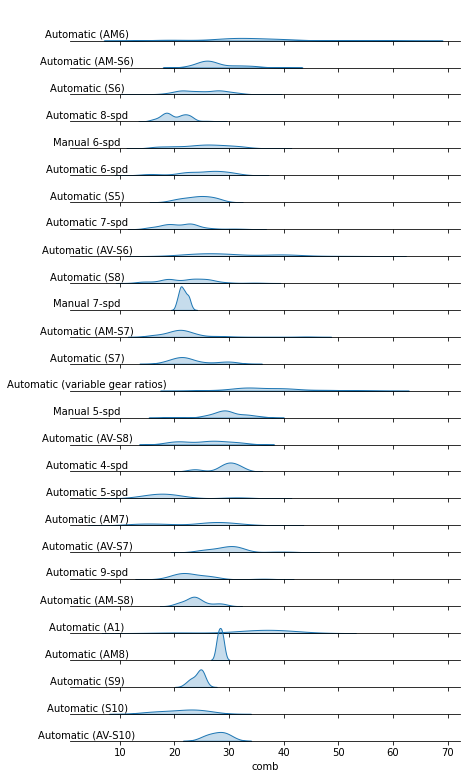

In [88]:
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index


g = sb.FacetGrid(data=fuel_econ, row='trans', height=0.5, 
                 col_order=group_order, aspect=14, gridspec_kws={'hspace': -0.2})
g.map(sb.kdeplot, 'comb', shade=True);

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha='center', va='bottom')
g.map(label_text, 'trans')
g.set_xlabels('comb')
g.set_titles('');

We make clever use of the `FacetGrid` object's `map` function to perform the plot modifications. Previously, you've seen `map` used where the first argument is a plotting function, the following arguments are positional variable strings, and any additional arguments are keyword arguments for the plotting function. 

In actuality, you can set any function as the first argument, which will be applied to each facet. To apply the transparency using `map`, I set up an anonymous lambda function that gets the current Axes (`gca`), selects its background (`patch`), and sets its transparency to full.

As for the second `map` argument, it sends a pandas Series to the function specified by the first argument. This Series is filtered to include only the column specified by the second `map` argument, with only the rows appropriate for each facet. In this case, I exploit the fact that the `'trans'` column is filled with copies of the categorical feature string to specify the `text` string, with hardcoded positional values appropriate to the plot. (`map` also sends a few general keyword arguments like `'color'` automatically to the specified function, hence the need for `**kwargs` to capture them despite not specifying any myself.) 

One downside to this approach is that the x-axis labels get replaced with `'trans'` after the `map` call, thus requiring the addition of a `set_xlabels` function call to reset the string back to `'comb'`.